In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def extract_features_from_windows(df, window_size=100, step_size=50):
    feature_rows = []
    for start in range(0, len(df) - window_size + 1, step_size):
        window = df.iloc[start:start + window_size]
        features = {
            'rms_ch1': np.sqrt(np.mean(window['ch1']**2)),
            'rms_ch2': np.sqrt(np.mean(window['ch2']**2)),
            'mav_ch1': np.mean(np.abs(window['ch1'])),
            'mav_ch2': np.mean(np.abs(window['ch2'])),
            'mse_ch1': np.mean((window['ch1'] - window['ch1'].mean())**2),
            'mse_ch2': np.mean((window['ch2'] - window['ch2'].mean())**2),
            'label': window['label'].iloc[0]
        }
        feature_rows.append(features)
    return pd.DataFrame(feature_rows)

In [3]:
gestures_files=['/content/index_finger_data.csv','/content/clenched_data.csv','/content/fist_data.csv','/content/four_data.csv','/content/okay_data.csv','/content/peace_data.csv','/content/rest_data.csv','/content/rock_data.csv','/content/spread_data.csv','/content/three_data.csv','/content/thumb_data.csv','/content/up_data.csv']
all_features=[]
for file in gestures_files:
  df=pd.read_csv(file)
  df_features=extract_features_from_windows(df,window_size=100, step_size=50)
  all_features.append(df_features)
data=pd.concat(all_features)
data.head()
data['label'].value_counts()

,count
label,
index_finger,119
clenched,119
fist,119
four,119
okay,119
peace,119
rest,119
rock,119
spread,119


In [4]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['label_encoded']=le.fit_transform(data['label'])
data.head()
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label Mapping:", label_mapping)

Label Mapping: {'clenched': np.int64(0), 'fist': np.int64(1), 'four': np.int64(2), 'index_finger': np.int64(3), 'okay': np.int64(4), 'peace': np.int64(5), 'rest': np.int64(6), 'rock': np.int64(7), 'spread': np.int64(8), 'three': np.int64(9), 'thumb': np.int64(10), 'up': np.int64(11)}


In [5]:
from sklearn.model_selection import train_test_split
x=data.drop(['label','label_encoded'],axis=1)
y=data['label_encoded']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,stratify=y,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1142, 6), (286, 6), (1142,), (286,))

In [6]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=5000)
model.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=5000, multi_class='multinomial')

(286,)
(286,)
Accuracy: 0.06993006993006994
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.06      0.08      0.07        24
           2       0.03      0.04      0.04        24
           3       0.00      0.00      0.00        24
           4       0.00      0.00      0.00        24
           5       0.09      0.21      0.13        24
           6       0.00      0.00      0.00        24
           7       0.06      0.12      0.08        24
           8       0.08      0.21      0.11        24
           9       0.00      0.00      0.00        23
          10       0.06      0.04      0.05        23
          11       0.07      0.12      0.09        24

    accuracy                           0.07       286
   macro avg       0.04      0.07      0.05       286
weighted avg       0.04      0.07      0.05       286

Confusion Matrix:
 [[ 0  0  3  0  0  6  0  3  5  0  3  4]
 [ 0  2

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<function matplotlib.pyplot.show(close=None, block=None)>

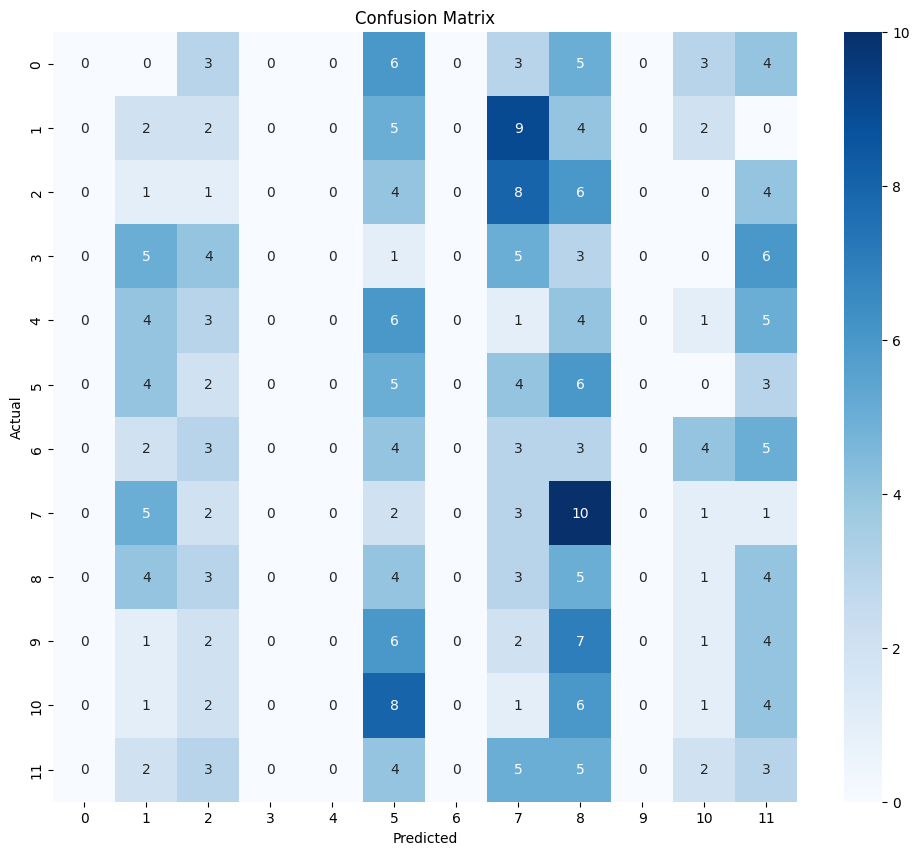

In [7]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
y_pred=model.predict(x_test)
print(y_pred.shape)
print(y_test.shape)
acc=accuracy_score(y_test,y_pred)
print('Accuracy:',acc)
cr=classification_report(y_test,y_pred)
print('Classification Report:\n',cr)
cm=confusion_matrix(y_test,y_pred)
print('Confusion Matrix:\n',cm)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show